Score: 0.64 ,original: 0.74

In [182]:
#Imports

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

#machine learning
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [183]:
#get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("../input/train.csv",dtype = {"Age":np.float64},)
test_df = pd.read_csv("../input/test.csv",dtype = {"Age":np.float64},)

#preview the data
#titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
#titanic_df.info()
#print ('---------------------------------')
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object

In [185]:
#drop unnecessory columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'],axis = 1)
test_df = test_df.drop(['Name','Ticket'],axis = 1)

In [186]:
#titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [187]:
#titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


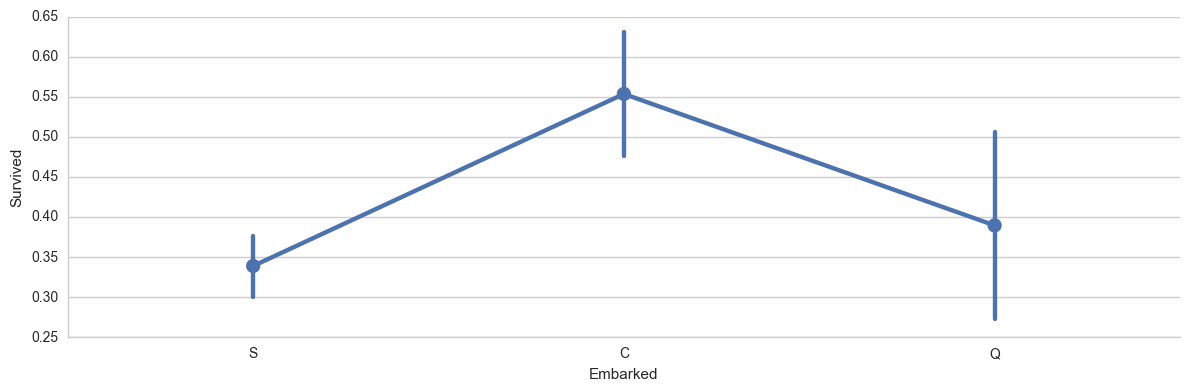

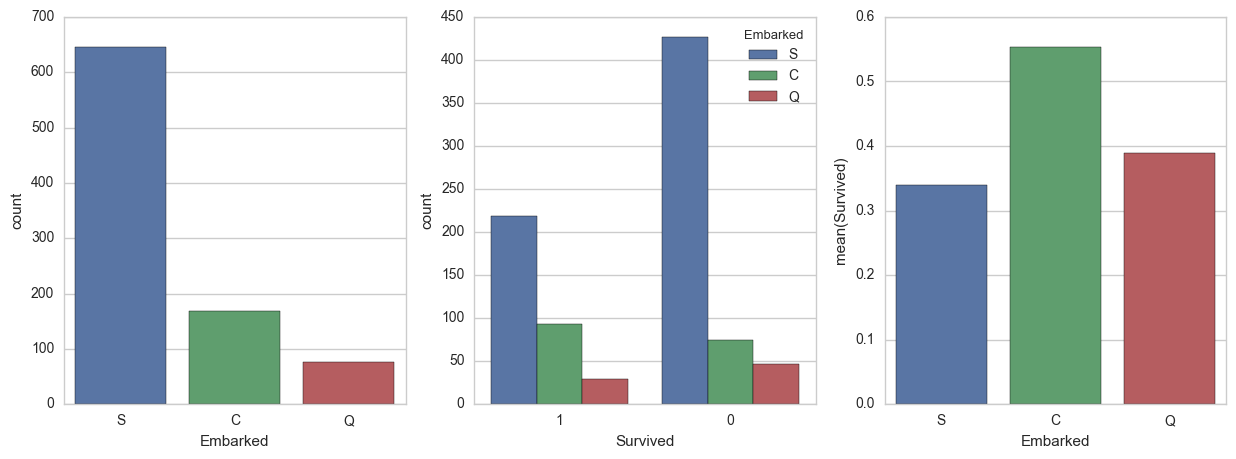

In [188]:
#embarked 
#titanic_df['Embarked'].describe()
#only in titanic_df,fill the two missing values with most ocurred value, which is "S"
#titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

if len(titanic_df['Embarked'][titanic_df['Embarked'].isnull()])>0:
    titanic_df['Embarked'][titanic_df['Embarked'].isnull()] = titanic_df['Embarked'].dropna().mode().values

if len(test_df['Embarked'][test_df['Embarked'].isnull()])>0:
    test_df['Embarked'][test_df['Embarked'].isnull()] = test_df['Embarked'].dropna().mode().values
#titanic_df.info()
#plot
sns.factorplot('Embarked','Survived',data = titanic_df,size = 4,aspect = 3)

fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked',data = titanic_df,ax = axis1)
sns.countplot(x = 'Survived',hue = 'Embarked',data = titanic_df,order = [1,0],ax = axis2)

#group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[['Embarked','Survived']].groupby(['Embarked'],as_index = False).mean()
sns.barplot(x = 'Embarked',y = 'Survived',data = embark_perc, order = ['S','C','Q'],ax = axis3)

In [189]:
#Either to consider Embarked column in predictions,
#and remove "S" dummy variable,
#and leave "C" & "Q",since them seem to have a good rate for Survival

#OR ,don't creat dummy variables for Embarked column, just drop it,
#because logically, Embarked doesn't seem to useful in prediction
embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
#embark_dummies_titanic

#embark_dummies_titanic.drop(['S'],axis = 1,inplace = True)

#embark_dummies_titanic

embark_dummies_test = pd.get_dummies(test_df['Embarked'])

#embark_dummies_test.drop(['S'],axis = 1,inplace = True)

titanic_df = titanic_df.join(embark_dummies_titanic)
#titanic_df
test_df = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'],axis = 1,inplace = True)
test_df.drop(['Embarked'],axis = 1,inplace = True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C85,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,NaN,0.0,0.0,1.0


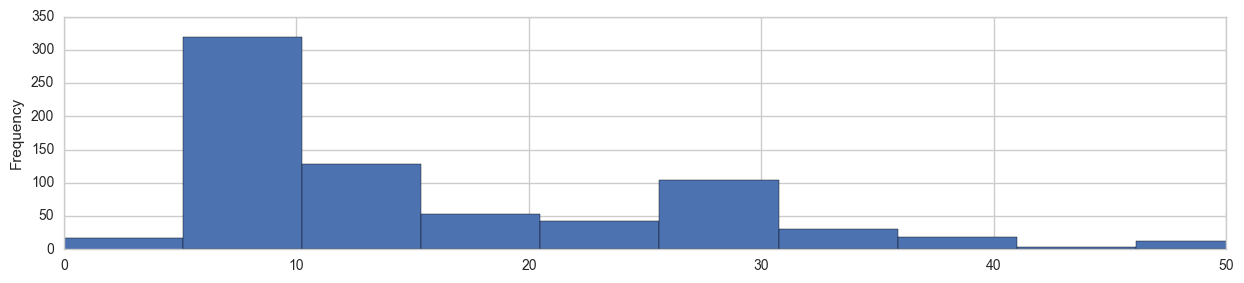

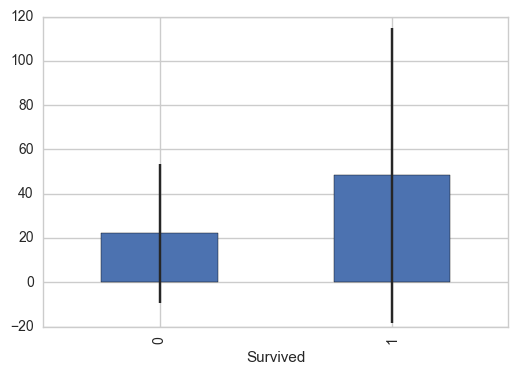

In [190]:
#Fare
#only for test_df,since there is a missing "Fare" values
#test_df["Fare"].fillna(test_df["Fare"].median(),inplace = True)

if len(test_df.Fare[test_df.Fare.isnull()])>0:
    median_fare = np.zeros(3)
    for f in range(0,3):
        median_fare[f] = test_df[test_df.Pclass == f+1]['Fare'].dropna().median()
    for f in range(0,3):
        test_df.loc[(test_df.Fare.isnull()) & (test_df.Pclass==f+1),'Fare'] = median_fare[f]

#convert from float to int
#titanic_df['Fare'] = titanic_df['Fare'].astype(int)
#test_df['Fare'] = test_df['Fare'].astype(int)

#get fare for survived & didn't survive passagers

fare_not_survived = titanic_df['Fare'][titanic_df['Survived']==0]
fare_survived = titanic_df['Fare'][titanic_df['Survived']==1]

#get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(),fare_survived.std()])

#plot
titanic_df['Fare'].plot(kind = 'hist',figsize = (15,3),bins = 100,xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ['Survived']
avgerage_fare.plot(yerr = std_fare,kind = 'bar',legend = False)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


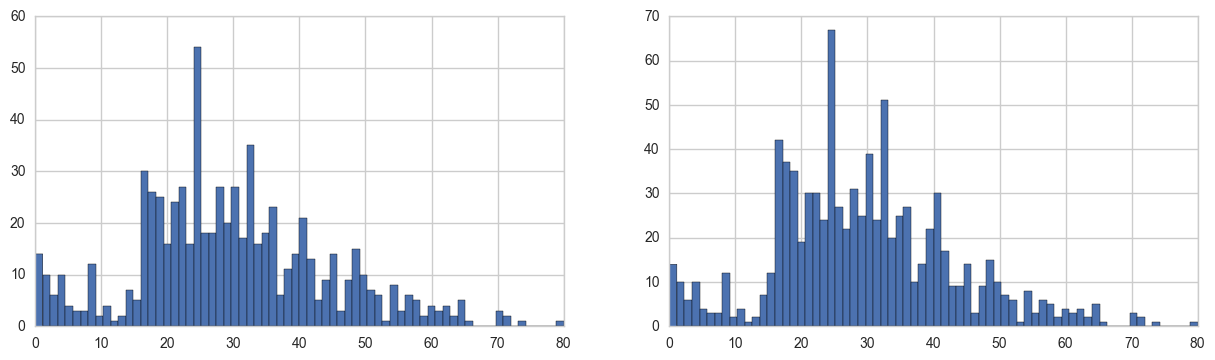

In [191]:
#Age
fig ,(axis1,axis2) = plt.subplots(1,2,figsize = (15,4))
axis1.set_title = 'Original Age values - Titanic'
axis2.set_title = 'New Age values - Titanic'

#get average,std,and number of NaN values in titanic_df
average_age_titanic = titanic_df['Age'].mean()
std_age_titanic = titanic_df['Age'].std()
count_nan_age_titanic = titanic_df['Age'].isnull().sum()

#get average,std, and number of NaN values in test_df
average_age_test = test_df['Age'].mean()
std_age_test = test_df['Age'].std()
count_nan_age_test = test_df['Age'].isnull().sum()

#generate random numbers between (mean-std) & (mean+std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic,average_age_titanic+std_age_titanic,size =count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test,average_age_test + std_age_test,size = count_nan_age_test)

#plot original Age Values
titanic_df['Age'].dropna().astype(int).hist(bins = 70,ax = axis1)

#fill NaN values in Age column with random values generated
titanic_df['Age'][np.isnan(titanic_df['Age'])] = rand_1
test_df['Age'][np.isnan(test_df['Age'])] = rand_2

#convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

#plot new Age Values
titanic_df['Age'].hist(bins = 70,ax = axis2)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


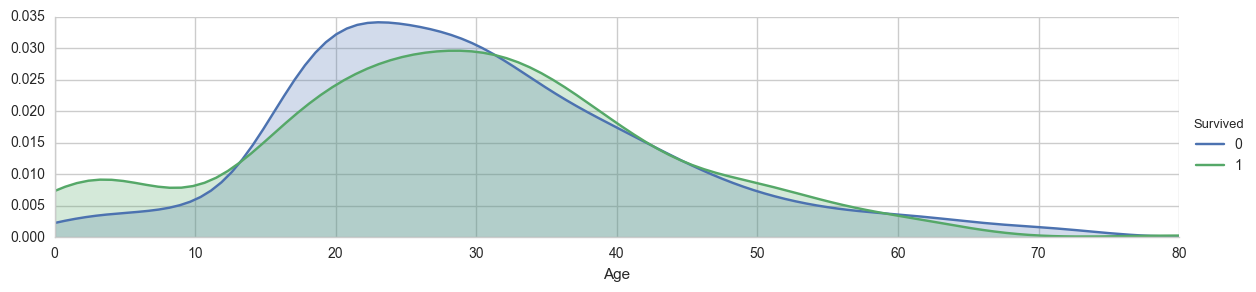

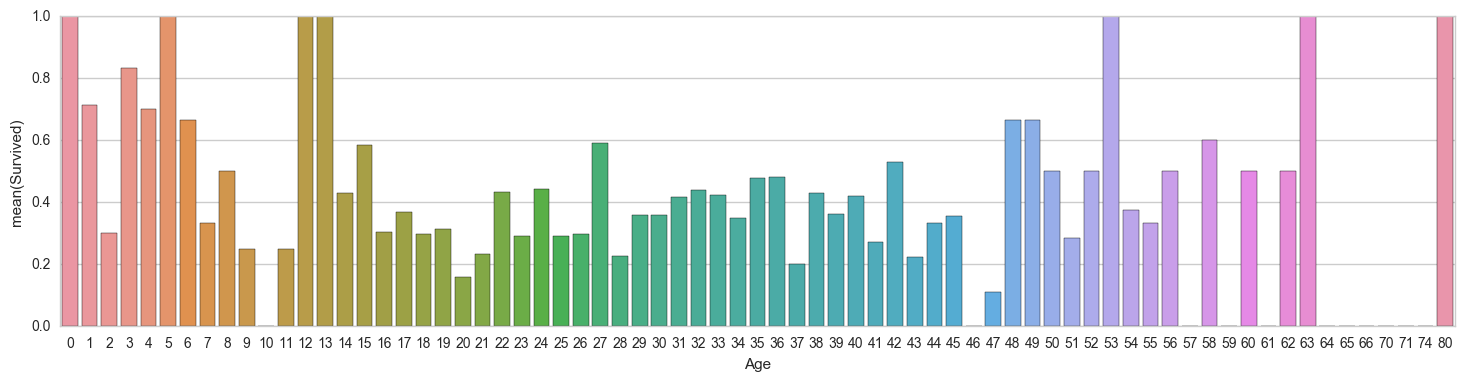

In [192]:
#continue with plot Age column
#peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(titanic_df,hue = 'Survived',aspect = 4)
facet.map(sns.kdeplot,'Age',shade = True)
facet.set(xlim = (0,titanic_df['Age'].max()))
facet.add_legend()

#average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[['Age','Survived']].groupby(['Age'],as_index = False).mean()
sns.barplot(x = 'Age',y = 'Survived',data=average_age)

In [193]:
#Cabin
#It has a lot of Nan Values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis = 1,inplace = True)
test_df.drop("Cabin",axis = 1,inplace = True)

In [194]:
#Family

#Instead of having two columns Parch & SibSp
#we can have only one column represent if the passenger had any family member aboard or not,
#Meaning , if having any family member(whether parent,brother,...etc) will increase chances of
#survival or not

#titanic_df['Family'] = titanic_df['Parch'] + titanic_df['SibSp']
#titanic_df['Family'].loc[titanic_df['Family']>0] = 1
#titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

#test_df['Family'] = test_df['Parch'] + test_df['SibSp']
#test_df['Family'].loc[test_df['Family']>0] = 1
#test_df['Family'].loc[test_df['Family'] == 0] = 0

#drop Parch & SibSp
#titanic_df = titanic_df.drop(['SibSp','Parch'],axis = 1)
#test_df = test_df.drop(['SibSp','Parch'],axis = 1)

#plot
#fig,(axis1,axis2)= plt.subplots(1,2,sharex = True,figsize = (10,5))
#sns.countplot(x='Family',data = titanic_df,order=[1,0],ax = axis1)

#average of survived for those who had/didn't have any family member
#family_perc = titanic_df[['Family','Survived']].groupby(['Family'],as_index = False).mean()
#sns.barplot(x = 'Family',y = 'Survived',data = family_perc,order = [1,0],ax = axis2)

#axis1.set_xticklabels(['With Family','Alone'],rotation = 0)


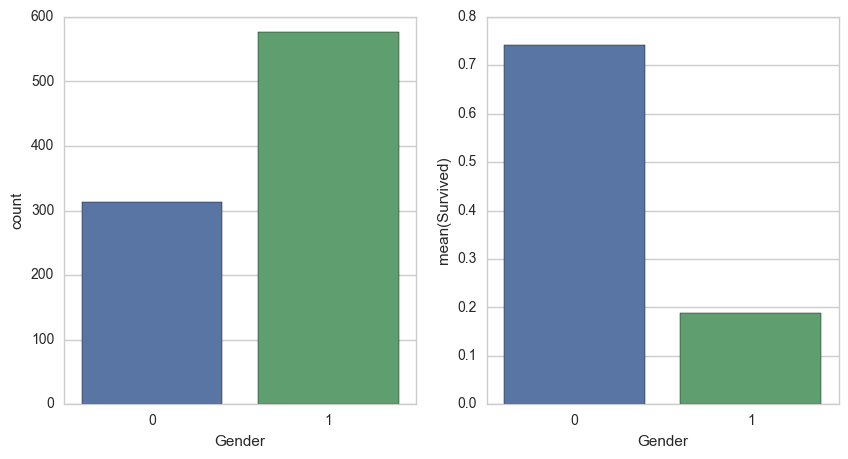

In [195]:
#Sex

#As we see , children (age < ~16) on aboard seem to have a high chances for Survival.
#So, we can classify passengers as males , females, and child

titanic_df['Gender'] = titanic_df['Sex'].map({'female':0,'male':1}).astype(int)
test_df['Gender'] = titanic_df['Sex'].map({'female':0,'male':1}).astype(int)

titanic_df = titanic_df.drop(['Sex'],axis = 1)
test_df = test_df.drop(['Sex'],axis = 1)

#def get_person(passenger):
#    age, sex = passenger
#    return 'child' if age < 16 else sex

#titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis = 1)
#test_df['Person'] = test_df[['Age','Sex']].apply(get_person,axis = 1)

#No need to use Sex column since we created Person column

#titanic_df.drop(['Sex'],axis = 1,inplace = True)
#test_df.drop(['Sex'],axis = 1,inplace = True)

#create dummy variables for Person column, & drop Male as it has the lowest average of survived passagers

#person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
#person_dummies_titanic.columns = ['Child','Female','Male']
#person_dummies_titanic.drop(['Male'],axis = 1,inplace = True)

#person_dummies_test = pd.get_dummies(test_df['Person'])
#person_dummies_test.columns = ['Child','Female','Male']
#person_dummies_test.drop(['Male'],axis = 1,inplace = True)

#titanic_df = titanic_df.join(person_dummies_titanic)
#test_df = test_df.join(person_dummies_test)

fig,(axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

#sns.countplot(x = 'Person',data = titanic_df,ax = axis1)
sns.countplot(x = 'Gender',data = titanic_df,ax = axis1)

#average of survived for each Person(male,female,or child)

#person_perc = titanic_df[['Person','Survived']].groupby(['Person'],as_index = False).mean()
#sns.barplot(x='Person',y = 'Survived',data = person_perc,ax = axis2,order = ['male','female','child'])

gender_perc = titanic_df[['Gender','Survived']].groupby(['Gender'],as_index = False).mean()
sns.barplot(x='Gender',y = 'Survived',data = gender_perc,ax = axis2,order = [0,1])

#titanic_df.drop(['Person'],axis = 1,inplace = True)
#test_df.drop(['Person'],axis = 1,inplace = True)

In [196]:
#Pclass

#sns.factorplot('Pclass','Survived',order = [1,2,3],data = titanic_df,size = 5)
#create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passagers

#pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
#pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
#pclass_dummies_titanic.drop(['Class_3'],axis = 1,inplace = True)

#pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
#pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
#pclass_dummies_test.drop(['Class_3'],axis = 1,inplace = True)

#titanic_df.drop(['Pclass'],axis = 1,inplace = True)
#test_df.drop(['Pclass'],axis = 1,inplace = True)

#titanic_df = titanic_df.join(pclass_dummies_titanic)
#test_df = test_df.join(pclass_dummies_test)

In [197]:
#define training and test sets
X_train = titanic_df.drop('Survived',axis = 1)
Y_train = titanic_df['Survived']
X_test = test_df.drop("PassengerId",axis = 1).copy()

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

In [198]:
#perceptron

#ppn = Perceptron(n_iter = 100,eta0 = 0.1,random_state = 0)
#ppn.fit(X_train_std,Y_train)

#Y_pred = ppn.predict(X_train_std)
#ppn_score = accuracy_score(Y_train,Y_pred)
#ppn_score

In [199]:
#Logistic Regression
#logreg = LogisticRegression()
#logreg.fit(X_train_std,Y_train)

#Y_pred = logreg.predict(X_train_std)
#logreg_score = accuracy_score(Y_train,Y_pred)
#logreg_score
#Y_pred = logreg.predict(X_test)
#logreg.score(X_train,Y_train)


In [200]:
#Support Vector Machines

#svm = SVC(kernel = 'linear',C=1.0,random_state = 0)
#svm.fit(X_train_std,Y_train)

#Y_pred = svm.predict(X_train_std)
#svm_score = accuracy_score(Y_train,Y_pred)
#svm_score

In [201]:
#Decision Tree

#decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 6,random_state = 0)
#decision_tree.fit(X_train,Y_train)

#Y_pred = decision_tree.predict(X_train)

#decision_tree_score_en = accuracy_score(Y_train,Y_pred)
#print (decision_tree_score_en)

#decision_tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 6,random_state = 0)
#decision_tree.fit(X_train,Y_train)

#Y_pred = decision_tree.predict(X_train)

#decision_tree_score_gi = accuracy_score(Y_train,Y_pred)
#print (decision_tree_score_gi)

In [202]:
#Random Forests
random_forest = RandomForestClassifier(criterion = 'entropy',n_estimators  = 100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_train)

#print (Y_pred)
#print (Y_train.values)

random_forest_score = accuracy_score(Y_train,Y_pred)
print (random_forest_score)

Y_pred_test = random_forest.predict(X_test)
#random_forest.score(X_train,Y_train)

0.985409652076


In [203]:
#bagging

#bag_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
#bag = BaggingClassifier(base_estimator = bag_tree,n_estimators = 100,max_samples = 1.0,max_features = 1.0,bootstrap = True,bootstrap_features = False,random_state = 1)
#bag = bag.fit(X_train,Y_train)
#Y_pred = bag.predict(X_train)

#bag_score = accuracy_score(Y_train,Y_pred)
#bag_score


In [204]:
#AdaBoost

#ada_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 1)
#ada = AdaBoostClassifier(base_estimator = ada_tree,n_estimators = 500,learning_rate = 0.1,random_state = 0)

#ada = ada.fit(X_train,Y_train)

#Y_pred = ada.predict(X_train)

#print (Y_pred)
#print (Y_train)

#ada_train_score = accuracy_score(Y_train,Y_pred)
#ada_train_score

In [205]:
#alpha for regularization
#mlp_classifier = MLPClassifier(solver = 'lbfgs',alpha = 1e-5,hidden_layer_sizes = (10,),random_state = 1)
#mlp_classifier.fit(X_train_std,Y_train)
#Y_pred = mlp_classifier.predict(X_train_std)

#mlp_score = accuracy_score(Y_train,Y_pred)
#mlp_score

In [206]:
#knn
#knn = KNeighborsClassifier(n_neighbors = 5,p = 2,metric = 'minkowski')
#knn.fit(X_train_std,Y_train)

#Y_pred = knn.predict(X_train_std)
#knn_score = accuracy_score(Y_train,Y_pred)
#knn_score

In [207]:
#Gaussian Naive Bayes
#gnb  = GaussianNB()
#gnb.fit(X_train,Y_train)

#Y_pred = gnb.predict(X_train)

#gnb_score = accuracy_score(Y_train,Y_pred)
#gnb_score

In [208]:
#get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])

#preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.896737
1,Age,-0.531269
2,SibSp,-0.345697
3,Parch,-0.072281
4,Fare,0.107666
5,C,0.083798
6,Q,0.039702
7,S,-0.098395
8,Gender,-1.289439


In [209]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],
                           'Survived':Y_pred_test})
submission.to_csv('titanic.csv',index = False)